In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tata-online-retail-dataset/Online Retail Data Set.xlsx
/kaggle/input/tata-online-retail-dataset/Online Retail Data Set.csv


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [44]:
df = pd.read_csv("/kaggle/input/tata-online-retail-dataset/Online Retail Data Set.csv", encoding = "unicode_escape")

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [47]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


array([[<Axes: title={'center': 'UnitPrice'}>]], dtype=object)

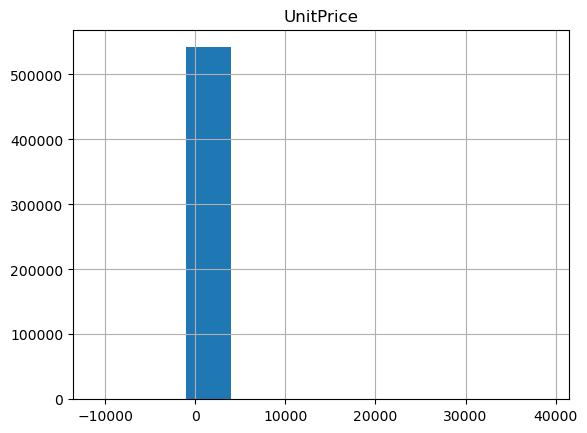

In [49]:
df.hist(column='UnitPrice',bins=10)

In [50]:
df.corr()

/tmp/ipykernel_32/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


DATA WRAGLING






cleaning the data

In [51]:
df.shape

(541909, 8)

In [52]:
df.duplicated().sum()

5268

In [53]:
df=df.drop_duplicates()

In [54]:
df.duplicated().sum()

0

In [55]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

1.  cleaning the missing values are present in description and customer.

In [56]:
copy=df.copy()#creating a copy to handle the missing value.

In [57]:
copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [58]:
df['Description']=df['Description'].fillna('NaN')
df['CustomerID']=df['CustomerID'].fillna(0)


In [59]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [61]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Quantity']=pd.to_numeric(df['Quantity'])
df['UnitPrice']=pd.to_numeric(df['UnitPrice'])

In [62]:
df['Time']=df['InvoiceDate'].dt.time
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Year']=df['InvoiceDate'].dt.year

In [63]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,08:26:00,January,Tuesday,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,08:26:00,January,Tuesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010


In [64]:
df['Total']=df['Quantity']*df['UnitPrice']

In [65]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,20.34


<Axes: >

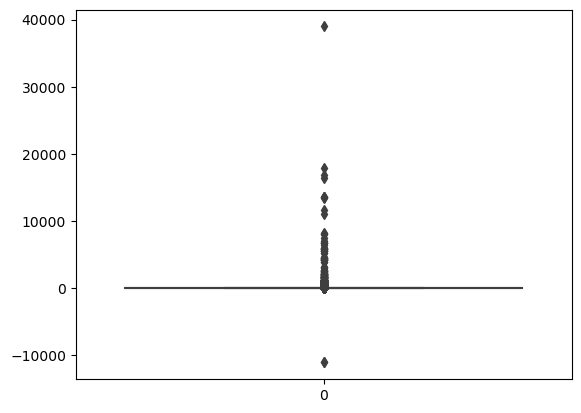

In [66]:
#check for unitprice distribution
sns.boxplot(df['UnitPrice'])

In [67]:
df['UnitPrice'].min()

-11062.06

In [68]:
#remove negative unitprices ,check what are the products in description are neagtive unitprices
df[df['UnitPrice']<0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
299983,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,0.0,United Kingdom,14:51:00,December,Thursday,2011,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,0.0,United Kingdom,14:52:00,December,Thursday,2011,-11062.06


In [69]:
#description has this name 'Adjust bad debt' which clearly shows that unwanted rows , so we can remove those rows
df[df['Description'].str.contains('Adjust bad debt',case=False)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
299982,A563185,B,Adjust bad debt,1,2011-12-08 14:50:00,11062.06,0.0,United Kingdom,14:50:00,December,Thursday,2011,11062.06
299983,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,0.0,United Kingdom,14:51:00,December,Thursday,2011,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,0.0,United Kingdom,14:52:00,December,Thursday,2011,-11062.06


In [72]:
remove=df['Description'].str.contains('Adjust bad debt',case=False)
df=df[~remove]

In [73]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,20.34


In [75]:
df['UnitPrice'].min()

0.0

In [1]:
df=df[df['UnitPrice']>0]

In [2]:
df['UnitPrice'].min()

0.001

<Axes: ylabel='Quantity'>

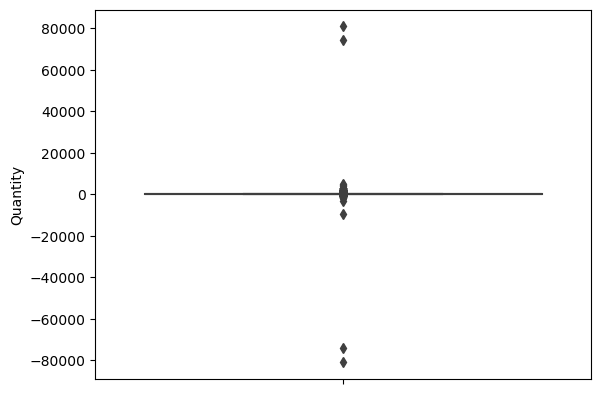

In [3]:
#check the quantity distribution
sns.boxplot(y='Quantity',data=df)

In [6]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,United Kingdom,09:41:00,January,Tuesday,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,United Kingdom,09:49:00,January,Tuesday,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,United Kingdom,10:24:00,January,Tuesday,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,10:24:00,January,Tuesday,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,10:24:00,January,Tuesday,2010,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12 09:57:00,0.83,14397.0,United Kingdom,09:57:00,September,Monday,2011,-9.13
541541,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498.0,United Kingdom,10:28:00,September,Monday,2011,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311.0,United Kingdom,11:57:00,September,Monday,2011,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315.0,United Kingdom,11:58:00,September,Monday,2011,-1.25


In [7]:
#remove the cancelled order 
cancelled_items=df[df['Quantity']<0]

In [8]:
df=df[df['Quantity']>0]

In [10]:
df['Quantity'].min()

1

1.**Top Performing Categories**: Identify which product categories are driving the most revenue and suggest focusing on expanding these offerings.

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,January,Tuesday,2010,20.34


In [16]:
top_performing_categories=df.groupby('Description')['Total'].sum().reset_index()

In [32]:

top_performing_categories=top_performing_categories.sort_values('Total',ascending = False )
top_performing_categories.head()


,Description,Total
1066,DOTCOM POSTAGE,206248.77
2852,REGENCY CAKESTAND 3 TIER,174156.54
2386,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3843,WHITE HANGING HEART T-LIGHT HOLDER,106236.72
2412,PARTY BUNTING,99445.23


Text(0.5, 0, 'Revenue generation of each product')

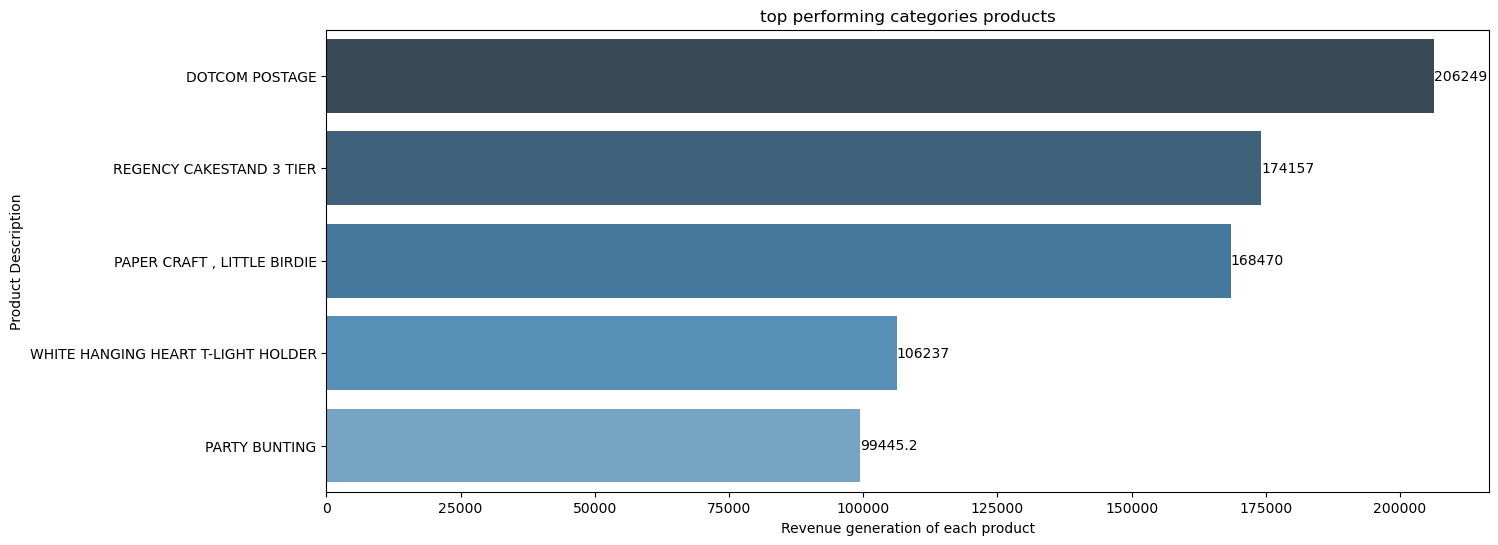

In [37]:
Palette = sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize = (15,6))

vis=sns.barplot(y='Description',x='Total',data=top_performing_categories,palette = Palette)
vis.bar_label(vis.containers[0])
plt.title('top performing categories products')
plt.ylabel('Product Description')
plt.xlabel('Revenue generation of each product')

2.**Geographic Insights**: Showcase regions where revenue is particularly strong. This could lead to strategic expansion efforts in these areas.

In [39]:
country_wise=df.groupby('Country')['Total'].sum().reset_index()
country_wise.head()

,Country,Total
0,Australia,138453.81
1,Austria,10198.68
2,Bahrain,754.14
3,Belgium,41196.34
4,Brazil,1143.60


In [40]:
country_wise=country_wise.sort_values('Total',ascending=False)
country_wise.head()

,Country,Total
36,United Kingdom,8990682.034
24,Netherlands,285446.340
10,EIRE,283140.520
14,Germany,228678.400
13,France,209625.370


Text(0.5, 0, 'Revenue generation of each country')

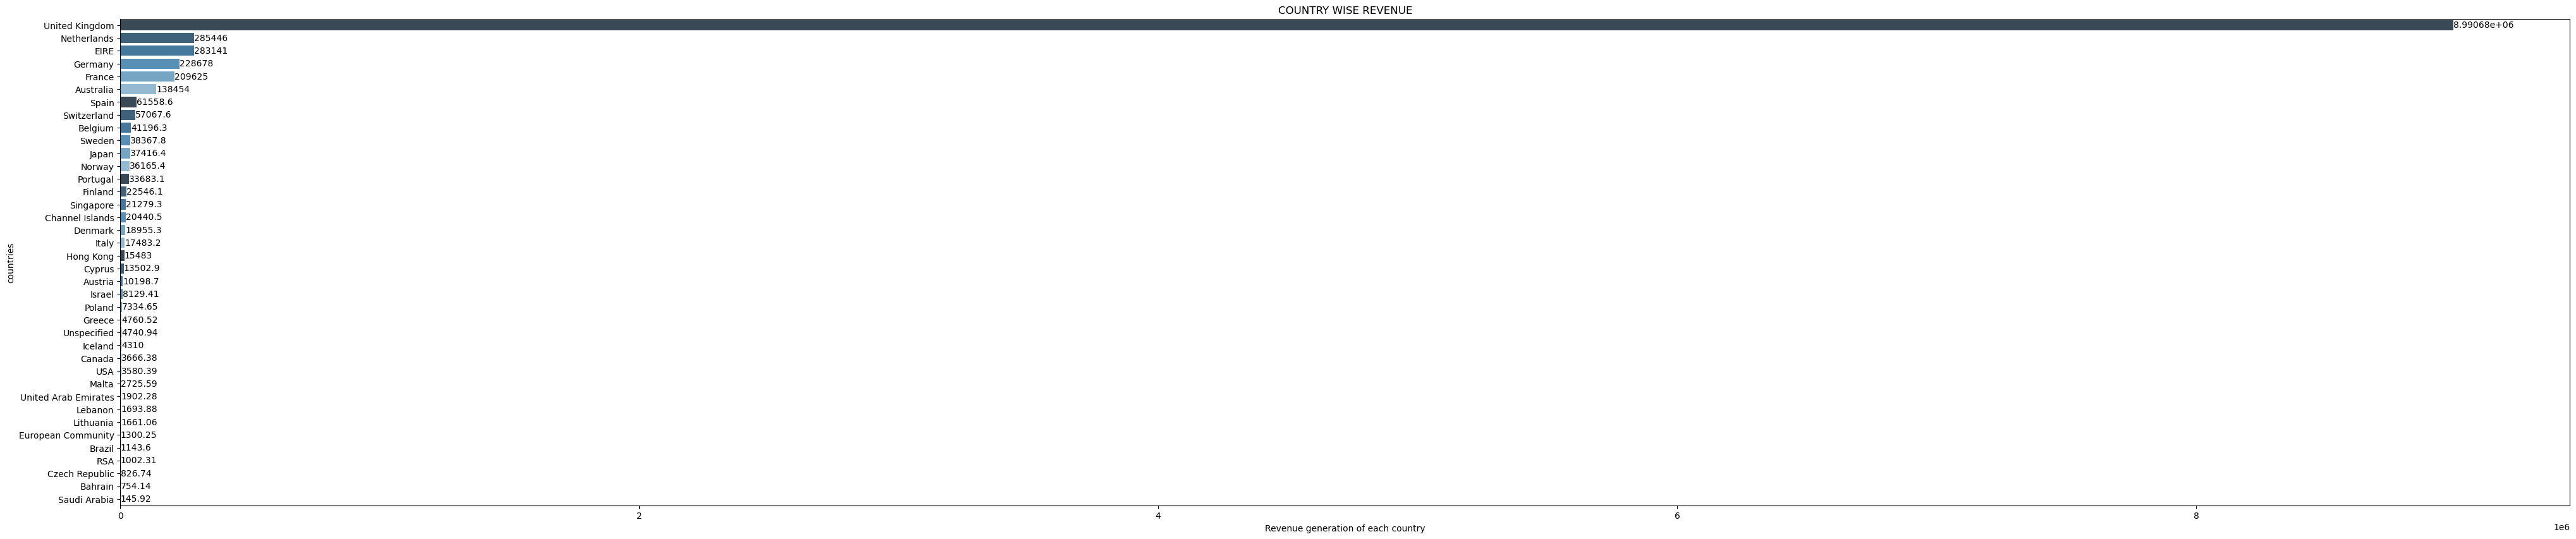

In [46]:
Palette=sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize=(50,10))
v=sns.barplot(y='Country',x='Total',data=country_wise,palette = Palette)
v.bar_label(v.containers[0])
plt.title('COUNTRY WISE REVENUE')
plt.ylabel('countries')
plt.xlabel('Revenue generation of each country')